Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за качественную работу, было интересно ее проверять
- Можно было бы поработать над оформлением еще немного и избежать дублирования кода
- Я оставил некоторые советы надеюсь они будут полезными или интересными.
- Техника бутстрап применилась корректно, было проведено тщательное исследование.
* Есть небольшие недочеты, но думаю ты быстро и легко это поправишь.
- Жду обновленную работу


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек на комментарии.
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# импортирование библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# инициализация рандомайзера
state = np.random.RandomState(12345)

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты и описание на месте
    
  
</div>


### Датасет 0

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
# просмотр первых и последних десяти строчек в таблице 
display(data_0.head(5))
display(data_0.tail(5))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246


In [3]:
# вывод информации о data_0
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Датасет 1

In [4]:
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
# просмотр первых и последних десяти строчек в таблице 
display(data_1.head(5))
display(data_1.tail(5))

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364
99999,relB0,-3.426139,-7.794274,-0.003299,3.179103


In [5]:
# вывод информации о data_1
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Датасет 2

In [6]:
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
# просмотр первых и последних десяти строчек в таблице 
display(data_2.head(5))
display(data_2.tail(5))

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,id,f0,f1,f2,product
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253
99999,V9kWn,-2.551421,-2.025625,6.090891,102.775767


In [7]:
# вывод информации о data_2
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Названия столбцов даны корректно. Пропусков в данных нет. Типы данных приведены верно. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены корректно
    
  
</div>
<div class="alert alert-block alert-info">
<b>Совет </b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям. 
    
Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) <br> P.S. Советую пробовал окально, на платформе будут проблемы
    
</div>

<div class="alert alert-warning">
<b>Комментарий студентки:</b>
    Посмотрю, спасибо !

## Обучение и проверка модели

### Модель для датасета 0

In [8]:
# создание выборок
features = data_0.drop(['product', 'id'], axis=1)
target = data_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

In [9]:
# создание и обучение модели для нулевого региона
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)

predictions_0 = model_0.predict(features_valid_0)

In [10]:
print('Средний запас предсказанного сырья:', predictions_0.mean())

mse_0 = mean_squared_error(target_valid_0, predictions_0)
print('RMSE:', mse_0**0.5)

Средний запас предсказанного сырья: 92.59256778438035
RMSE: 37.5794217150813


### Модель для датасета 1

In [11]:
# создание выборок
features = data_1.drop(['product', 'id'], axis=1)
target = data_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

In [12]:
# создание и обучение модели для первого региона
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)

predictions_1 = model_1.predict(features_valid_1)

In [13]:
print('Средний запас предсказанного сырья:', predictions_1.mean())

mse_1 = mean_squared_error(target_valid_1, predictions_1)
print('RMSE:', mse_1**0.5)

Средний запас предсказанного сырья: 68.728546895446
RMSE: 0.893099286775617


### Модель для датасета 2

In [14]:
# создание выборок
features = data_2.drop(['product', 'id'], axis=1)
target = data_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

In [15]:
# создание и обучение модели для второго региона
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)

predictions_2 = model_2.predict(features_valid_2)

In [16]:
print('Средний запас предсказанного сырья:', predictions_2.mean())

mse_2 = mean_squared_error(target_valid_2, predictions_2)
print('RMSE:', mse_2**0.5)

Средний запас предсказанного сырья: 94.96504596800489
RMSE: 40.02970873393434


Лучше всего обучилась модель для региона 1. Самые высокие средние запасы продукта в регионе 2.

<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан хорошо, все нужные метрики посчитаны корректно. 
</div>
<div class="alert alert-block alert-info">
    
<b>совет:</b> Здесь можно было бы использовать циклы/фуннкции и избежать дублирования кода
  
</div>

## Подготовка к расчёту прибыли

In [17]:
# создание датафреймов с предсказанным и реальным объемом по трем регионам
barrels_0 = pd.DataFrame(data=predictions_0, columns=['predicted_amount_barrels'])
barrels_0['real_amount_barrels'] = target_valid_0.reset_index(drop=True)

barrels_1 = pd.DataFrame(data=predictions_1, columns=['predicted_amount_barrels'])
barrels_1['real_amount_barrels'] = target_valid_1.reset_index(drop=True)

barrels_2 = pd.DataFrame(data=predictions_2, columns=['predicted_amount_barrels'])
barrels_2['real_amount_barrels'] = target_valid_2.reset_index(drop=True)

In [18]:
# бюджет на разработку скважин в регионе
budget = 10**10
# доход с каждой единицы продукта
income_per_unit = 450000

min_amount_barrel = budget/income_per_unit

amount_of_barrels_0 = predictions_0.mean() * 200
amount_of_barrels_1 = predictions_1.mean() * 200
amount_of_barrels_2 = predictions_2.mean() * 200

print('Достаточный объём сырья для безубыточной разработки новой скважины:', min_amount_barrel)
print()
print('Средний предсказанный запас в регионе 0:', amount_of_barrels_0)
print('Средний предсказанный запас в регионе 1:', amount_of_barrels_1)
print('Средний предсказанный запас в регионе 2:', amount_of_barrels_2)
print()
print('Средний запас в регионе 0:', target_valid_0.mean() * 200)
print('Средний запас в регионе 1:', target_valid_1.mean() * 200)
print('Средний запас в регионе 2:', target_valid_2.mean() * 200)

Достаточный объём сырья для безубыточной разработки новой скважины: 22222.222222222223

Средний предсказанный запас в регионе 0: 18518.51355687607
Средний предсказанный запас в регионе 1: 13745.7093790892
Средний предсказанный запас в регионе 2: 18993.009193600978

Средний запас в регионе 0: 18415.719348165854
Средний запас в регионе 1: 13744.627204871995
Средний запас в регионе 2: 18976.846561770875


Модель очень точно предсказала объемы продукта. Самые большие средние запасы продукта находятся в регионе 2. Однако средние запасы во всех трех регионах ниже, чем достаточный объем для безубыточный разработки скважен, следовательно, однозначно есть риск убыли. 

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Чтобы посчитать значение для безубыточной разработки новой скважины, еще нужно разделить на кол-во скважин (200). Но так как ты потом корректно сравниваешь это со средним запасом, то это синий комментарий
  
</div>

## Расчёт прибыли и рисков 

In [19]:
# функция подсчета прибыли
def count_income(target, predictions):
    # отбор двухста лучших точек
    best_barrels = predictions.sort_values(ascending=False).head(200)
    # сумма их целевого признака
    amount = target[best_barrels.index].sum()
    # чистый доход
    income = income_per_unit * amount - budget
    return income

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция прибыли определена верно
    
  
</div>


In [20]:
# функция бутстрапа
def bootstrap(data): 
    values = []
    for i in range(1000):
        subsample_target = data['real_amount_barrels'].sample(n=500, replace=True, random_state=state)
        subsample_predictions = data['predicted_amount_barrels'][subsample_target.index]
        value = count_income(subsample_target, subsample_predictions)
        values.append(value)
    values = pd.Series(values)
    return values

<div class="alert alert-block alert-success">
<b>Успех:</b> С бутстрапом тоже все в порядке
    
  
</div>


In [21]:
# функция вычисления риска убыли
# def count_risk(values):
    # count = 0 
    # for i in values:
        # if i < 0:
            # count+=1
    # return count/(len(values))

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Риски также можно считать лаконично в 1 строку : `(values < 0).mean()`
    
  
</div>

<div class="alert alert-warning">
<b>Комментарий студентки:</b>
    Исправила

In [22]:
def calculations(values):
    print('Средняя прибыль:', values.mean())
    print('95%-й доверительный интервал:', 'от', format(values.quantile(.025), '.3f'), 'до',
      format(values.quantile(.975), '.3f'))
    print('Риск убытков:', (values < 0).mean() * 100, '%')
    print()
    print('Распределение прибыли:')
    values.hist()

### Вычисления для датасета 0

In [23]:
values_0 = bootstrap(barrels_0)

Средняя прибыль: 600735244.2611653
95%-й доверительный интервал: от 12948331.135 до 1231163605.791
Риск убытков: 2.0 %

Распределение прибыли:


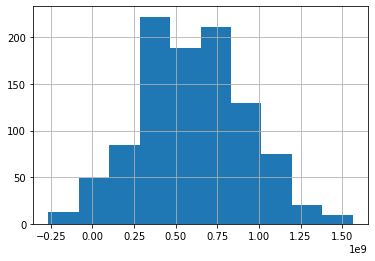

In [24]:
calculations(values_0)

Средняя прибыль составляет примерно 600 миллионов. 95%-й доверительный интервал от 1 миллиона 290 тысяч до 1 миллиарда 230 миллионов.  Риск убытков невелик - 2%. 

### Вычисления для датасета 1

In [25]:
values_1 = bootstrap(barrels_1)

Средняя прибыль: 663958995.2601906
95%-й доверительный интервал: от 206476361.252 до 1191197684.749
Риск убытков: 0.1 %

Распределение прибыли:


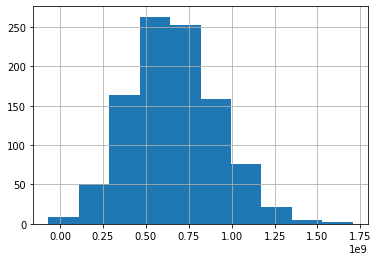

In [26]:
calculations(values_1)

Средняя прибыль составляет примерно 660 миллионов. 95%-й доверительный интервал от 206 миллионов до 1 миллиарда 120 миллионов. Риск убытков мал - 0.1%. 

### Вычисления для датасета 2

In [27]:
values_2 = bootstrap(barrels_2)

Средняя прибыль: 597381047.9005232
95%-й доверительный интервал: от 1734929.531 до 1246217960.165
Риск убытков: 2.5 %

Распределение прибыли:


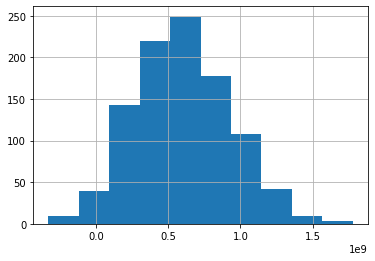

In [28]:
calculations(values_2)

Средняя прибыль составляет примерно 597 миллионов. 95%-й доверительный интервал от 1 миллиона 734 тысяч 1 миллиард 245 миллионов. Риск убытков большой - 2.5%.

<div class="alert alert-block alert-danger">
    
<b>Ошибка:</b> 95% дов интервал, это 0.025 и. 0.975 квантили
    
  
</div>

<div class="alert alert-block alert-info">
    
<b>совет:</b> Здесь бы тоже не помешали функции/циклы для лаконичности
    
  
</div>

<div class="alert alert-warning">
<b>Комментарий студентки:</b>
    Исправила

## Вывод

Мною было создано три модели, предсказывающие объем в каждом отдельном регионе. Согласно предсказаниям самые большие объемы продукта находятся в регионе 2, что и подтверждается исходными данными. Сравнивая средние запасы по региону с достаточным объемом продукта для безубытосной разработки, мы видим, что средние запасы ниже, следовательно, риск убыли будет всегда. 

Самый маленький риск убытков в регионе 1: 0.1%. Самая большая средняя прибыль тоже в регионе 1: 660 миллионов. Но доверительный интервал больше у региона 0: 1 миллиард 135 миллионов. Тем не менее лучший вариант для разработки - это регион 1.

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично! Проведено детальное исследование и тобою был выбран правильный регион, поздравляю! Не забудь обновить его, если потребуется
     
  
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован